# Words and Documents

## TF-IDF

### Toy Example

In [1]:
import math

document1 = "Machine learning teaches machine to learn"
document2 = "Machine translation interesting subject"
document3 = "Term frequency inverse document frequency important"

#pre-process
documents = [document1, document2, document3]
for i in range(len(documents)):
    normalized_document = [word.lower() for word in documents[i].split()]
    documents[i] =  " ".join(normalized_document)

for document in documents:
    print(document)

machine learning teaches machine to learn
machine translation interesting subject
term frequency inverse document frequency important


In [2]:
# term frequency
def termFrequency(term, document):
    word_count = document.count(term)
    doc_len = len(document.split())
    return word_count/doc_len

# Term frequency test run:
for document in documents:
    for term in document.split():
        print(f"{term}: {termFrequency(term, document):.2f}")

machine: 0.33
learning: 0.17
teaches: 0.17
machine: 0.33
to: 0.17
learn: 0.33
machine: 0.25
translation: 0.25
interesting: 0.25
subject: 0.25
term: 0.17
frequency: 0.33
inverse: 0.17
document: 0.17
frequency: 0.33
important: 0.17


In [3]:
# IDF of a term with +1 smoothing
def inverseDocumentFrequency(term, documents):
    count = 0
    for doc in documents:
        if term.lower() in doc.lower().split():
            count += 1
    if count > 0:
        return 1 + math.log(float(len(documents)) / count)
    else:
        return 1.0
    
#IDF test run:
vocab = set([word for word in (" ".join(documents)).split()])
print(vocab, "\n")
for term in vocab:
    print(f"{term}: {inverseDocumentFrequency(term, documents):.2f}")

{'to', 'frequency', 'learn', 'inverse', 'learning', 'term', 'translation', 'teaches', 'machine', 'subject', 'important', 'document', 'interesting'} 

to: 2.10
frequency: 2.10
learn: 2.10
inverse: 2.10
learning: 2.10
term: 2.10
translation: 2.10
teaches: 2.10
machine: 1.41
subject: 2.10
important: 2.10
document: 2.10
interesting: 2.10


In [4]:
# tf-idf of a term in a document
def tf_idf(term, document, documents):
    tf = termFrequency(term, document)
    idf = inverseDocumentFrequency(term, documents)
    return tf * idf

# tf-idf test run:
doc_num=1;
for document in documents:
    print("Document {}".format(doc_num))
    doc_num+=1
    for term in document.split():
        print(f"{term}: {tf_idf(term, document, documents):.2f}")
    print()

Document 1
machine: 0.47
learning: 0.35
teaches: 0.35
machine: 0.47
to: 0.35
learn: 0.70

Document 2
machine: 0.35
translation: 0.52
interesting: 0.52
subject: 0.52

Document 3
term: 0.35
frequency: 0.70
inverse: 0.35
document: 0.35
frequency: 0.70
important: 0.35



### Automate

We'll automate this calculation using sklearn's [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) and [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer).

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

countVectorizer = CountVectorizer()
wordCount = countVectorizer.fit_transform(documents)
print(wordCount.toarray())
df = pd.DataFrame(wordCount.toarray())
df.columns = countVectorizer.get_feature_names_out()
df

[[0 0 0 0 0 1 1 2 0 1 0 1 0]
 [0 0 0 1 0 0 0 1 1 0 0 0 1]
 [1 2 1 0 1 0 0 0 0 0 1 0 0]]


,document,frequency,important,interesting,inverse,learn,learning,machine,subject,teaches,term,to,translation
0,0,0,0,0,0,1,1,2,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,2,1,0,1,0,0,0,0,0,1,0,0


In [6]:
tfIdfTransformer = TfidfTransformer(use_idf=True)
tfIdfVector = tfIdfTransformer.fit_transform(wordCount)
tfIdf_array = tfIdfVector.toarray()

vocab = countVectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(np.round(tfIdf_array, 2), columns=vocab)
tfidf_df

,document,frequency,important,interesting,inverse,learn,learning,machine,subject,teaches,term,to,translation
0,0.00,0.00,0.00,0.00,0.00,0.4,0.4,0.61,0.00,0.4,0.00,0.4,0.00
1,0.00,0.00,0.00,0.53,0.00,0.0,0.0,0.40,0.53,0.0,0.00,0.0,0.53
2,0.35,0.71,0.35,0.00,0.35,0.0,0.0,0.00,0.00,0.0,0.35,0.0,0.00


In [7]:
query = "machine learning"
documents = [document1, document2, document3, query]
query_vector = countVectorizer.fit_transform(documents)
df = pd.DataFrame(query_vector.toarray())
df.columns = countVectorizer.get_feature_names_out()
df

,document,frequency,important,interesting,inverse,learn,learning,machine,subject,teaches,term,to,translation
0,0,0,0,0,0,1,1,2,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,2,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,1,0,0,0,0,0


In [8]:
tfIdfTransformer = TfidfTransformer(use_idf=True)
tfIdfVector = tfIdfTransformer.fit_transform(query_vector)
tfIdf_array = tfIdfVector.toarray()

vocab = countVectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(np.round(tfIdf_array, 2), columns=vocab)
tfidf_df

,document,frequency,important,interesting,inverse,learn,learning,machine,subject,teaches,term,to,translation
0,0.00,0.00,0.00,0.00,0.00,0.44,0.34,0.56,0.00,0.44,0.00,0.44,0.00
1,0.00,0.00,0.00,0.54,0.00,0.00,0.00,0.35,0.54,0.00,0.00,0.00,0.54
2,0.35,0.71,0.35,0.00,0.35,0.00,0.00,0.00,0.00,0.00,0.35,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.78,0.63,0.00,0.00,0.00,0.00,0.00


In [9]:
#Cosine similarity using sklearn

from sklearn.metrics.pairwise import cosine_similarity
cosine_compare = cosine_similarity(tfIdf_array, tfIdf_array)
query_row = cosine_compare[3]
query_compare = query_row[:-1]
print(query_compare)
print("The query is most like document {}".format(query_compare.argmax()))

[0.61793163 0.21757626 0.        ]
The query is most like document 0


In [10]:
#Jaccard similarity

from sklearn.metrics import jaccard_score
doc1 = documents[0].split()[:4]
doc2 = documents[1].split()
jaccard_score(doc1, doc2, average="micro")

0.14285714285714285

### Real Example
In this example we will be working with the innaugaral address corpus.

In [11]:
import pandas as pd
from nltk.corpus import inaugural


speeches = []
for fileid in inaugural.fileids():
    speeches.append((fileid, inaugural.raw(fileid)))

speeches_df = pd.DataFrame(speeches, columns=['filename','text'])
speeches_df.sample(10, random_state = 5)

,filename,text
31,1913-Wilson.txt,There has been a change of government. It bega...
42,1957-Eisenhower.txt,"The Price of Peace\nMr. Chairman, Mr. Vice Pre..."
34,1925-Coolidge.txt,"My countrymen,\n\nno one can contemplate curre..."
51,1993-Clinton.txt,"My fellow citizens, today we celebrate the mys..."
55,2009-Obama.txt,My fellow citizens:\n\nI stand here today humb...
19,1865-Lincoln.txt,Fellow-Countrymen:\n\nAt this second appearing...
43,1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
26,1893-Cleveland.txt,"My Fellow citizens, in obedience of the mandat..."
23,1881-Garfield.txt,Fellow-Citizens:\n\nWe stand to-day upon an em...
28,1901-McKinley.txt,"My fellow-citizens, when we assembled here on ..."


## Exploratory Data Analysis

### Describe the data


In [12]:
nRow, nCol = speeches_df.shape
print(f'There are {nRow} rows and {nCol} columns')

speeches_df.info()

There are 59 rows and 2 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  59 non-null     object
 1   text      59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


<AxesSubplot:xlabel='Speech length', ylabel='No. of speeches'>

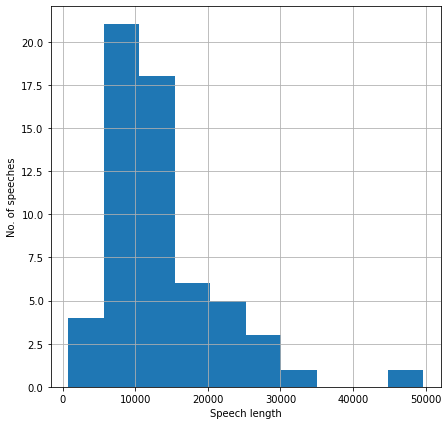

In [13]:
# visualizing  length
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.xlabel("Speech length")
plt.ylabel("No. of speeches")

speeches_df['text'].str.len().hist()

In [14]:
speeches_df["speech_length"] = speeches_df["text"].apply(len)
long_speeches_df = speeches_df.loc[speeches_df['speech_length'] > 20000]
long_speeches_df

,filename,text,speech_length
8,1821-Monroe.txt,"Fellow citizens, I shall not attempt to descri...",26326
12,1837-VanBuren.txt,Fellow citizens: The practice of all my predec...,23417
13,1841-Harrison.txt,Called from a retirement which I had supposed ...,49700
14,1845-Polk.txt,"Fellow citizens, without solicitation on my pa...",28716
16,1853-Pierce.txt,"My Countrymen, It a relief to feel that no hea...",20081
18,1861-Lincoln.txt,Fellow-Citizens of the United States: In compl...,21017
25,1889-Harrison.txt,"Fellow-Citizens, there is no constitutional or...",26179
27,1897-McKinley.txt,"Fellow citizens, In obedience to the will of t...",23659
30,1909-Taft.txt,My fellow citizens: Anyone who has taken the o...,32164
33,1921-Harding.txt,My Countrymen:\n\nWhen one surveys the world a...,20298


### Preprocessing

import libraries

In [15]:
import nltk
from nltk.tokenize import word_tokenize
import contractions

speeches_df.sample(10, random_state = 5)

,filename,text,speech_length
31,1913-Wilson.txt,There has been a change of government. It bega...,9563
42,1957-Eisenhower.txt,"The Price of Peace\nMr. Chairman, Mr. Vice Pre...",9190
34,1925-Coolidge.txt,"My countrymen,\n\nno one can contemplate curre...",23949
51,1993-Clinton.txt,"My fellow citizens, today we celebrate the mys...",9114
55,2009-Obama.txt,My fellow citizens:\n\nI stand here today humb...,13439
19,1865-Lincoln.txt,Fellow-Countrymen:\n\nAt this second appearing...,3926
43,1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
26,1893-Cleveland.txt,"My Fellow citizens, in obedience of the mandat...",12349
23,1881-Garfield.txt,Fellow-Citizens:\n\nWe stand to-day upon an em...,17767
28,1901-McKinley.txt,"My fellow-citizens, when we assembled here on ...",13408


In [16]:
# expand contractions
speeches_df['text'] = speeches_df['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
#joining back the list of items into one string
speeches_df['text'] = [' '.join(map(str, l)) for l in speeches_df['text']]
speeches_df.sample(10, random_state = 5)

,filename,text,speech_length
31,1913-Wilson.txt,There has been a change of government. It bega...,9563
42,1957-Eisenhower.txt,"The Price of Peace Mr. Chairman, Mr. Vice Pres...",9190
34,1925-Coolidge.txt,"My countrymen, no one can contemplate current ...",23949
51,1993-Clinton.txt,"My fellow citizens, today we celebrate the mys...",9114
55,2009-Obama.txt,My fellow citizens: I stand here today humbled...,13439
19,1865-Lincoln.txt,Fellow-Countrymen: At this second appearing to...,3926
43,1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
26,1893-Cleveland.txt,"My Fellow citizens, in obedience of the mandat...",12349
23,1881-Garfield.txt,Fellow-Citizens: We stand to-day upon an emine...,17767
28,1901-McKinley.txt,"My fellow-citizens, when we assembled here on ...",13408


In [17]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re
speeches_df['text'] = speeches_df['text'].str.lower()
speeches_df['text'] = speeches_df['text'].str.replace("-", " ")
speeches_df['text'] = speeches_df['text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

speeches_df.sample(10, random_state = 5)

,filename,text,speech_length
31,1913-Wilson.txt,there has been a change of government it began...,9563
42,1957-Eisenhower.txt,the price of peace mr chairman mr vice preside...,9190
34,1925-Coolidge.txt,my countrymen no one can contemplate current c...,23949
51,1993-Clinton.txt,my fellow citizens today we celebrate the myst...,9114
55,2009-Obama.txt,my fellow citizens i stand here today humbled ...,13439
19,1865-Lincoln.txt,fellow countrymen at this second appearing to ...,3926
43,1961-Kennedy.txt,vice president johnson mr speaker mr chief jus...,7618
26,1893-Cleveland.txt,my fellow citizens in obedience of the mandate...,12349
23,1881-Garfield.txt,fellow citizens we stand to day upon an eminen...,17767
28,1901-McKinley.txt,my fellow citizens when we assembled here on t...,13408


In [18]:
#tokenize

speeches_df['tokenized_text'] = speeches_df['text'].apply(word_tokenize)
speeches_df.sample(10, random_state = 5)

,filename,text,speech_length,tokenized_text
31,1913-Wilson.txt,there has been a change of government it began...,9563,"[there, has, been, a, change, of, government, ..."
42,1957-Eisenhower.txt,the price of peace mr chairman mr vice preside...,9190,"[the, price, of, peace, mr, chairman, mr, vice..."
34,1925-Coolidge.txt,my countrymen no one can contemplate current c...,23949,"[my, countrymen, no, one, can, contemplate, cu..."
51,1993-Clinton.txt,my fellow citizens today we celebrate the myst...,9114,"[my, fellow, citizens, today, we, celebrate, t..."
55,2009-Obama.txt,my fellow citizens i stand here today humbled ...,13439,"[my, fellow, citizens, i, stand, here, today, ..."
19,1865-Lincoln.txt,fellow countrymen at this second appearing to ...,3926,"[fellow, countrymen, at, this, second, appeari..."
43,1961-Kennedy.txt,vice president johnson mr speaker mr chief jus...,7618,"[vice, president, johnson, mr, speaker, mr, ch..."
26,1893-Cleveland.txt,my fellow citizens in obedience of the mandate...,12349,"[my, fellow, citizens, in, obedience, of, the,..."
23,1881-Garfield.txt,fellow citizens we stand to day upon an eminen...,17767,"[fellow, citizens, we, stand, to, day, upon, a..."
28,1901-McKinley.txt,my fellow citizens when we assembled here on t...,13408,"[my, fellow, citizens, when, we, assembled, he..."


### POS Tags

In [19]:
#check POS Tags for a sample

tagged_text = []
tagged = []

for word in speeches_df['tokenized_text'].sample(10, random_state = 5):
    tagged_word = nltk.pos_tag(word)
    #print(tagged_word)
    
    tagged_text.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_text)

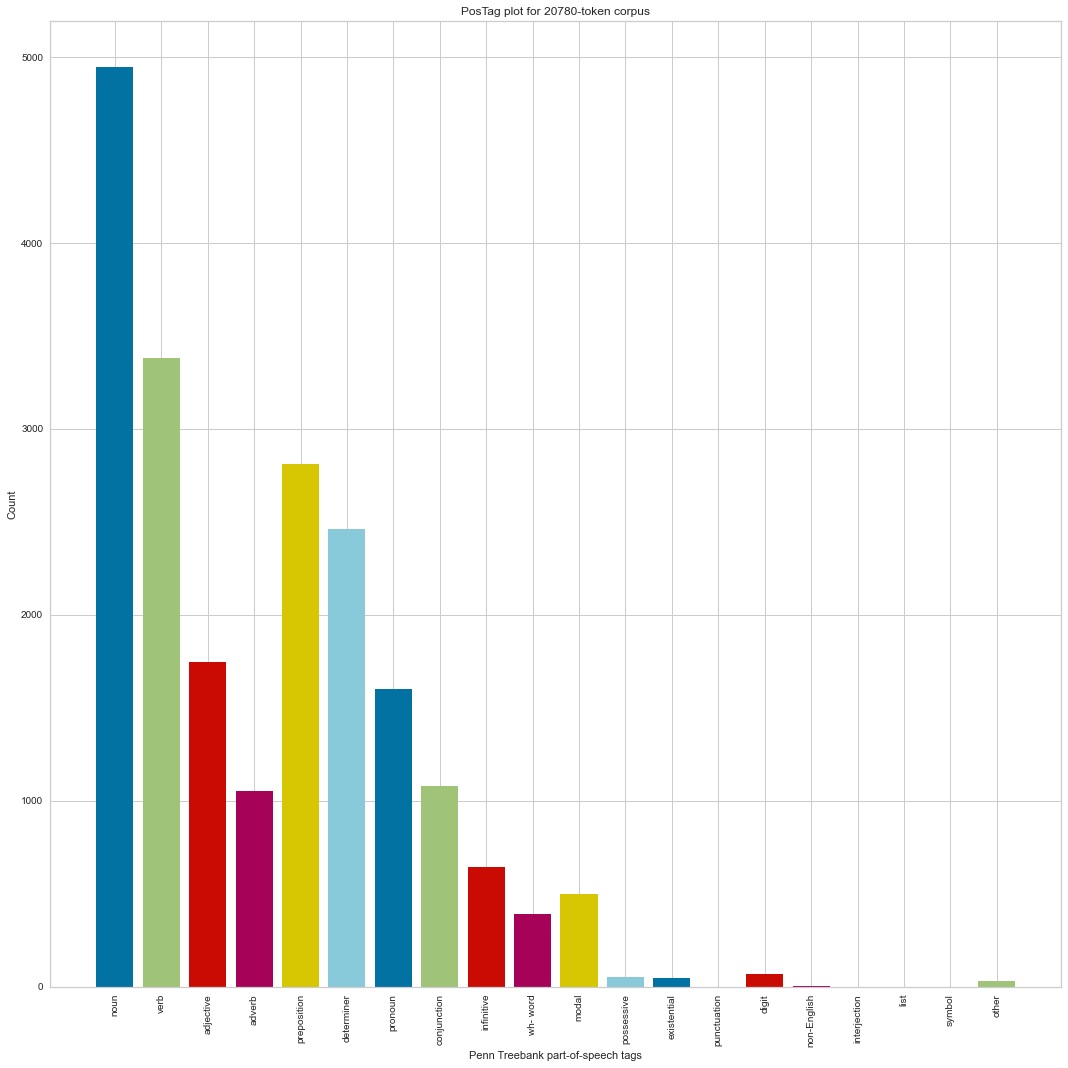

<AxesSubplot:title={'center':'PosTag plot for 20780-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [20]:
from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

### Common words and Stopwords

In [21]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import  Counter
stop_words = set(stopwords.words('english'))
len(stop_words)

179

In [22]:

trump_words = (speeches_df['tokenized_text'][-2:-1]).values.tolist()
trump_counter = Counter(trump_words[0])
common_trump_words = trump_counter.most_common()
print(common_trump_words[:50])

[('and', 76), ('the', 71), ('we', 49), ('of', 48), ('our', 48), ('will', 43), ('to', 37), ('is', 22), ('america', 20), ('a', 15), ('you', 14), ('in', 14), ('for', 14), ('all', 14), ('are', 13), ('but', 13), ('be', 13), ('their', 11), ('this', 11), ('not', 11), ('from', 11), ('it', 11), ('your', 11), ('american', 11), ('people', 10), ('that', 10), ('country', 9), ('again', 9), ('have', 8), ('one', 8), ('nation', 8), ('with', 8), ('every', 7), ('world', 6), ('now', 6), ('great', 6), ('on', 6), ('has', 6), ('back', 6), ('while', 6), ('by', 6), ('no', 6), ('never', 6), ('new', 6), ('same', 6), ('president', 5), ('many', 5), ('they', 5), ('today', 5), ("'s", 5)]


In [23]:
washington_lists = (speeches_df['tokenized_text'][0:1]).values.tolist()
washington_words = [word for lst in washington_lists for word in lst] 
washington_counter = Counter(washington_words)
common_washington_words = washington_counter.most_common()
print(common_washington_words[:50])                          

[('the', 116), ('of', 71), ('and', 48), ('to', 48), ('which', 36), ('in', 31), ('i', 23), ('be', 23), ('my', 22), ('by', 20), ('that', 18), ('with', 17), ('on', 15), ('a', 14), ('as', 14), ('have', 12), ('for', 12), ('it', 11), ('an', 10), ('this', 10), ('will', 10), ('your', 9), ('can', 9), ('every', 9), ('no', 8), ('me', 8), ('more', 8), ('government', 8), ('from', 7), ('is', 7), ('been', 7), ('than', 6), ('public', 6), ('may', 6), ('citizens', 5), ('present', 5), ('country', 5), ('his', 5), ('has', 5), ('or', 5), ('under', 5), ('you', 5), ('was', 4), ('one', 4), ('being', 4), ('not', 4), ('ought', 4), ('duty', 4), ('its', 4), ('people', 4)]


In [24]:
#create a list of 50 most common words in the text
lists_of_words = speeches_df['tokenized_text'].values.tolist()
words=[word for lst in lists_of_words for word in lst]
counter=Counter(words)
common_words=counter.most_common()
common_words = common_words[:50]

<AxesSubplot:>

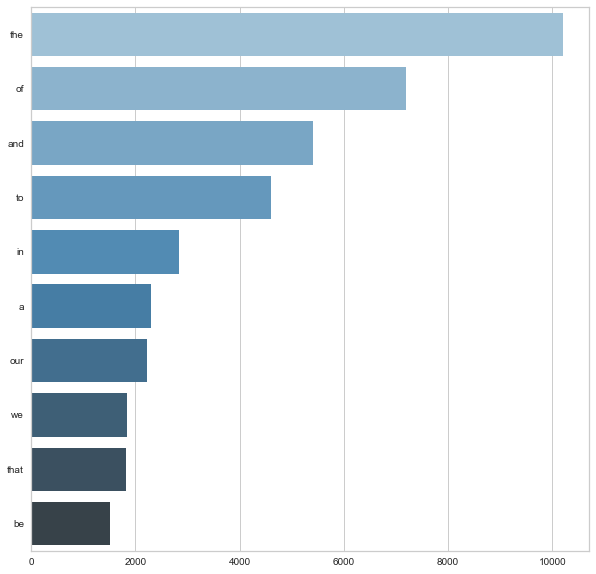

In [25]:
#visualize stop words
import seaborn as sns
x, y=[],[]
for word,count in common_words:
    if (word in stop_words):
        x.append(word)
        y.append(count)
        
        
#visualize top 10
x = x[:10]
y = y[:10]

plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x, palette = 'Blues_d')

<AxesSubplot:>

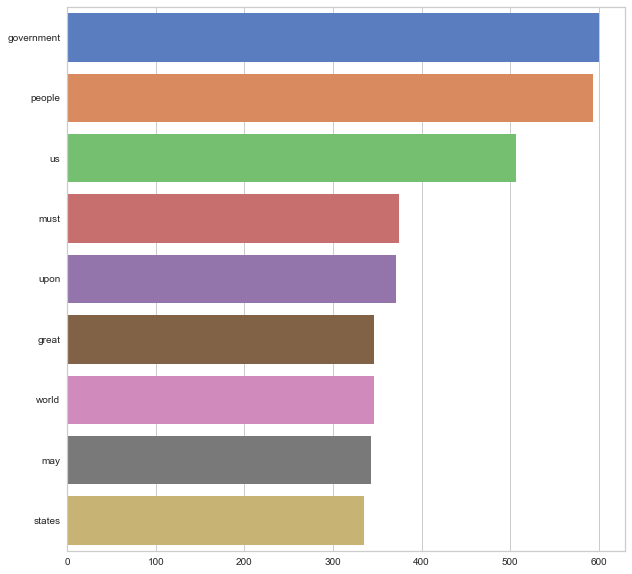

In [26]:
# visualize other words
x, y=[], []
for word,count in common_words:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x, palette='muted')

In [27]:
#remove stopwords
speeches_df['tokenized_text'] = speeches_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
speeches_df.sample(10, random_state = 5)

,filename,text,speech_length,tokenized_text
31,1913-Wilson.txt,there has been a change of government it began...,9563,"[change, government, began, two, years, ago, h..."
42,1957-Eisenhower.txt,the price of peace mr chairman mr vice preside...,9190,"[price, peace, mr, chairman, mr, vice, preside..."
34,1925-Coolidge.txt,my countrymen no one can contemplate current c...,23949,"[countrymen, one, contemplate, current, condit..."
51,1993-Clinton.txt,my fellow citizens today we celebrate the myst...,9114,"[fellow, citizens, today, celebrate, mystery, ..."
55,2009-Obama.txt,my fellow citizens i stand here today humbled ...,13439,"[fellow, citizens, stand, today, humbled, task..."
19,1865-Lincoln.txt,fellow countrymen at this second appearing to ...,3926,"[fellow, countrymen, second, appearing, take, ..."
43,1961-Kennedy.txt,vice president johnson mr speaker mr chief jus...,7618,"[vice, president, johnson, mr, speaker, mr, ch..."
26,1893-Cleveland.txt,my fellow citizens in obedience of the mandate...,12349,"[fellow, citizens, obedience, mandate, country..."
23,1881-Garfield.txt,fellow citizens we stand to day upon an eminen...,17767,"[fellow, citizens, stand, day, upon, eminence,..."
28,1901-McKinley.txt,my fellow citizens when we assembled here on t...,13408,"[fellow, citizens, assembled, 4th, march, 1897..."


In [28]:
# text without stop words
speeches_df['text_no_stopwords'] = [' '.join(map(str, l)) for l in speeches_df['tokenized_text']]
speeches_df.sample(10, random_state = 5)

,filename,text,speech_length,tokenized_text,text_no_stopwords
31,1913-Wilson.txt,there has been a change of government it began...,9563,"[change, government, began, two, years, ago, h...",change government began two years ago house re...
42,1957-Eisenhower.txt,the price of peace mr chairman mr vice preside...,9190,"[price, peace, mr, chairman, mr, vice, preside...",price peace mr chairman mr vice president mr c...
34,1925-Coolidge.txt,my countrymen no one can contemplate current c...,23949,"[countrymen, one, contemplate, current, condit...",countrymen one contemplate current conditions ...
51,1993-Clinton.txt,my fellow citizens today we celebrate the myst...,9114,"[fellow, citizens, today, celebrate, mystery, ...",fellow citizens today celebrate mystery americ...
55,2009-Obama.txt,my fellow citizens i stand here today humbled ...,13439,"[fellow, citizens, stand, today, humbled, task...",fellow citizens stand today humbled task us gr...
19,1865-Lincoln.txt,fellow countrymen at this second appearing to ...,3926,"[fellow, countrymen, second, appearing, take, ...",fellow countrymen second appearing take oath p...
43,1961-Kennedy.txt,vice president johnson mr speaker mr chief jus...,7618,"[vice, president, johnson, mr, speaker, mr, ch...",vice president johnson mr speaker mr chief jus...
26,1893-Cleveland.txt,my fellow citizens in obedience of the mandate...,12349,"[fellow, citizens, obedience, mandate, country...",fellow citizens obedience mandate countrymen d...
23,1881-Garfield.txt,fellow citizens we stand to day upon an eminen...,17767,"[fellow, citizens, stand, day, upon, eminence,...",fellow citizens stand day upon eminence overlo...
28,1901-McKinley.txt,my fellow citizens when we assembled here on t...,13408,"[fellow, citizens, assembled, 4th, march, 1897...",fellow citizens assembled 4th march 1897 great...


In [29]:
speeches_df.head()

,filename,text,speech_length,tokenized_text,text_no_stopwords
0,1789-Washington.txt,fellow citizens of the senate and of the house...,8619,"[fellow, citizens, senate, house, representati...",fellow citizens senate house representatives a...
1,1793-Washington.txt,fellow citizens i am again called upon by the ...,791,"[fellow, citizens, called, upon, voice, countr...",fellow citizens called upon voice country exec...
2,1797-Adams.txt,when it was first perceived in early times tha...,13877,"[first, perceived, early, times, middle, cours...",first perceived early times middle course amer...
3,1801-Jefferson.txt,friends and fellow citizens called upon to und...,10137,"[friends, fellow, citizens, called, upon, unde...",friends fellow citizens called upon undertake ...
4,1805-Jefferson.txt,proceeding fellow citizens to that qualificati...,12908,"[proceeding, fellow, citizens, qualification, ...",proceeding fellow citizens qualification const...


### TF-IDF

We'll automate this calculation using [sklearn's built-in capabilities to calculate TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [31]:
# tfidf calculation
vector = TfidfVectorizer(max_df=0.3,         # drop words that occur in more than X percent of documents
                             #min_df=8,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )

In [32]:
#subset of text
text = speeches_df['text_no_stopwords']
text_subset = text[0:10]
print(text_subset)
tfidf_subset = vector.fit_transform(text_subset)

0    fellow citizens senate house representatives a...
1    fellow citizens called upon voice country exec...
2    first perceived early times middle course amer...
3    friends fellow citizens called upon undertake ...
4    proceeding fellow citizens qualification const...
5    unwilling depart examples revered authority av...
6    add solemnity oath obligations imposed second ...
7    destitute feeling deeply affected strong proof...
8    fellow citizens shall attempt describe gratefu...
9    compliance usage coeval existence federal cons...
Name: text_no_stopwords, dtype: object


In [33]:
tfidf_subset = tfidf_subset.toarray()

vocab = vector.get_feature_names_out()
tfidf_df = pd.DataFrame(np.round(tfidf_subset, 2), columns=vocab)
tfidf_df

,120000000,14th,1801,1815,1816,1817,1818,20000,20th,3d,...,write,written,wrong,wrongs,yield,yielding,youthful,zealous,zealously,zone
0,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.05,0.00,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.04,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.06,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.05,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.03,0.03,0.00,0.03
8,0.03,0.00,0.03,0.05,0.03,0.05,0.05,0.03,0.03,0.03,...,0.00,0.00,0.0,0.00,0.02,0.00,0.00,0.02,0.02,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.03,0.03,0.04,0.00,0.00,0.00,0.00


In [34]:
tfidf_subset.shape

(10, 2753)

In [35]:
print(vocab[1500:1700])

['knowledge' 'known' 'labor' 'laborer' 'labors' 'laid' 'lakes' 'language'
 'languor' 'larger' 'largest' 'lasting' 'lastly' 'late' 'lately' 'latent'
 'latitude' 'launched' 'lawful' 'lay' 'lead' 'leads' 'league' 'learn'
 'learnt' 'leave' 'leaving' 'led' 'left' 'legal' 'legislation'
 'legislative' 'legislature' 'legislatures' 'legitimate' 'lessen'
 'lessons' 'letters' 'leveled' 'liable' 'liberal' 'liberality' 'liberally'
 'liberate' 'liberated' 'liberties' 'licentiousness' 'lie' 'lieu' 'lifted'
 'light' 'lighted' 'lightly' 'lights' 'likely' 'likewise' 'limit'
 'limitation' 'limitations' 'limited' 'line' 'literary' 'live' 'lived'
 'lives' 'loans' 'local' 'longer' 'looked' 'looking' 'loose' 'lopped'
 'lord' 'lose' 'loss' 'lost' 'lot' 'louisiana' 'luxuries' 'magistrate'
 'magnanimity' 'magnanimous' 'magnificence' 'magnitude' 'maimed'
 'maintained' 'maintaining' 'maintenance' 'majestic' 'majesty' 'majority'
 'make' 'makes' 'making' 'man' 'managed' 'management' 'mandates' 'manhood'
 'manifesta

In [36]:
#entire corpus
text = speeches_df['text_no_stopwords']
tfidf = vector.fit_transform(text)
tfidf_array = tfidf.toarray()
vocab = vector.get_feature_names_out()
tfidf_df = pd.DataFrame(np.round(tfidf_array, 2), columns=vocab)
tfidf_df

,100,1000,100000000,108,120000000,125,13,14th,15th,16,...,younger,youngest,yourselfxand,youth,youthful,youâi,zeal,zealous,zealously,zone
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.04,0.00,0.03,0.03,0.00,0.04
8,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00


In [37]:
#most important terms
trump_row = (tfidf_array[57])
top_term = trump_row.argmax()
print(vocab[top_term])

biden_row = (tfidf_array[58])
top_term = biden_row.argmax()
print(vocab[top_term])

washington_row = (tfidf_array[0])[0]
top_term = washington_row.argmax()
print(vocab[top_term])

dreams
story
100


## Bag of Words

In [38]:
# get a subset of speeches
speeches_df_random = speeches_df['text_no_stopwords'].sample(5)
speeches_df_random

16    countrymen relief feel heart know personal reg...
57    chief justice roberts president carter preside...
53    president clinton distinguished guests fellow ...
22    fellow citizens assembled repeat public ceremo...
43    vice president johnson mr speaker mr chief jus...
Name: text_no_stopwords, dtype: object

In [39]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow = CountVectorizer()

In [40]:
bag_of_words = vectorizer_bow.fit_transform(speeches_df_random)

In [41]:
feature_names = vectorizer_bow.get_feature_names_out()
print(len(feature_names))
print(feature_names[1000:1200])

2197
['ignored' 'ill' 'illuminated' 'illumines' 'illustrated' 'image'
 'immeasurable' 'immediate' 'immigrant' 'immigration' 'imperative'
 'imperatively' 'implied' 'implies' 'import' 'importance' 'important'
 'importantly' 'importunate' 'impose' 'imposed' 'impoverished' 'impressed'
 'impressive' 'improvement' 'impulse' 'impunity' 'inadmissible'
 'inaugurated' 'inauguration' 'inborn' 'incidents' 'incomparably'
 'inconsiderable' 'increase' 'increasing' 'indeed' 'independence'
 'independent' 'indications' 'individual' 'individually' 'individuals'
 'industries' 'industry' 'inestimable' 'influence' 'influenced'
 'infrastructure' 'infringed' 'infused' 'inherent' 'inheritance'
 'inherited' 'inner' 'inseparable' 'inside' 'insignificance'
 'insignificant' 'inspection' 'inspire' 'instance' 'instead' 'institution'
 'institutions' 'instruction' 'instrumentality' 'instruments' 'integrity'
 'intellects' 'intellectual' 'intelligence' 'intelligent' 'intend'
 'intends' 'intercourse' 'interest' 'interest

In [42]:
print(bag_of_words.shape)

(5, 2197)


In [43]:
print(bag_of_words.toarray()) 

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]
 [1 1 0 ... 0 1 0]]


In [44]:
doc_term_matrix = bag_of_words.todense()
doc_term_matrix

matrix([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [1, 1, 0, ..., 0, 1, 0]])

In [45]:
#all speeches
bag_of_words = vectorizer_bow.fit_transform(speeches_df['text_no_stopwords'])
doc_term_matrix = bag_of_words.todense()
doc_term_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [46]:
#most frequent words
feature_names = vectorizer_bow.get_feature_names_out()
trump_row=(doc_term_matrix[57])
most = trump_row.argmax()
print(feature_names[most])

biden_row=(doc_term_matrix[58])
most = biden_row.argmax()
print(feature_names[most])

washington_row = (doc_term_matrix[0])
most = washington_row.argmax()
print(feature_names[most])

america
us
every


## Document Similarity


1.   Euclidean Distance
2.   Cosine Similarity
3.   Jaccard Similarity


### Eculidean Distance

The Euclidean distance between two points in Euclidean space is the length of a line segment between the two points.

source: [Wikipedia](https://en.wikipedia.org/wiki/Euclidean_distance)

In [47]:
from sklearn.metrics.pairwise import euclidean_distances

In [48]:
euclidean_compare = euclidean_distances(tfidf_array, tfidf_array)
euclidean_compare

array([[0.        , 1.39102036, 1.34542743, ..., 1.39630522, 1.4046833 ,
        1.39127426],
       [1.39102036, 0.        , 1.40445368, ..., 1.39515403, 1.40905481,
        1.40947068],
       [1.34542743, 1.40445368, 0.        , ..., 1.38944674, 1.39745591,
        1.39781686],
       ...,
       [1.39630522, 1.39515403, 1.38944674, ..., 0.        , 1.32232677,
        1.31620602],
       [1.4046833 , 1.40905481, 1.39745591, ..., 1.32232677, 0.        ,
        1.31745858],
       [1.39127426, 1.40947068, 1.39781686, ..., 1.31620602, 1.31745858,
        0.        ]])

In [49]:
biden_row = euclidean_compare[-1:][0]
biden_compare = biden_row[:-1]
most_alike = biden_compare.argmin()
print(f"{speeches_df['filename'][58]} is most similar to {speeches_df['filename'][most_alike]}")

2021-Biden.txt is most similar to 2001-Bush.txt


### Cosine Similarity
The resulting similarity ranges from −1 meaning exactly opposite, to 1 meaning exactly the same, with 0 indicating orthogonality or decorrelation, while in-between values indicate intermediate similarity or dissimilarity.

source: [Wikipedia](https://en.wikipedia.org/wiki/Cosine_similarity)

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
cosine_compare = cosine_similarity(tfidf_array, tfidf_array)
cosine_compare

array([[1.        , 0.03253118, 0.09491252, ..., 0.02516587, 0.01343241,
        0.03217796],
       [0.03253118, 1.        , 0.01375493, ..., 0.02677261, 0.00728227,
        0.0066962 ],
       [0.09491252, 0.01375493, 1.        , ..., 0.03471888, 0.02355849,
        0.02305401],
       ...,
       [0.02516587, 0.02677261, 0.03471888, ..., 1.        , 0.12572596,
        0.13380085],
       [0.01343241, 0.00728227, 0.02355849, ..., 0.12572596, 1.        ,
        0.13215144],
       [0.03217796, 0.0066962 , 0.02305401, ..., 0.13380085, 0.13215144,
        1.        ]])

In [52]:
biden_row = cosine_compare[-1:][0]
biden_compare = biden_row[:-1]
most_alike = biden_compare.argmax()
print("{} is most similar to {}".format(speeches_df['filename'][58], speeches_df['filename'][most_alike]))

2021-Biden.txt is most similar to 2001-Bush.txt


### Jaccard Similarity
 Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets.
 
 source: [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html)

In [53]:
from sklearn.metrics import jaccard_score
doc1 = np.array(doc_term_matrix[52])
doc2 = np.array(doc_term_matrix[58])
jaccard_score(doc1[0], doc2[0], average="micro")

0.8015974755941229

In [54]:
speeches_first = np.array(doc_term_matrix[0:5])
speeches_middle = np.array(doc_term_matrix[23:28])
jaccard_score(speeches_first[0], speeches_middle[0], average='micro')

0.7737864077669903

In [55]:
speeches_recent = np.array(doc_term_matrix[-5:])
jaccard_score(speeches_first[0], speeches_recent[0], average='micro')

0.8024861878453039

In [56]:
jaccard_score(speeches_middle[0], speeches_recent[0], average='micro')

0.7606244579358196